In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'../data/Bias_correction_ucl.csv')
df.drop('Date', axis=1, inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [19]:
df.describe

<bound method NDFrame.describe of       station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750      NaN          20.0          11.3    19.794666    58.936283   
7751      NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.0

In [31]:
y = np.asarray(df.Next_Tmax)
x = np.asarray(df.drop('Next_Tmax', axis=1))
x = np.nan_to_num(x)
y = np.nan_to_num(y)
print(np.isnan(x).sum())
print(np.isnan(y).sum())
x.shape

0
0


(7752, 23)

In [33]:
# Normalize
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x = s.fit_transform(x)
x.shape

(7752, 23)

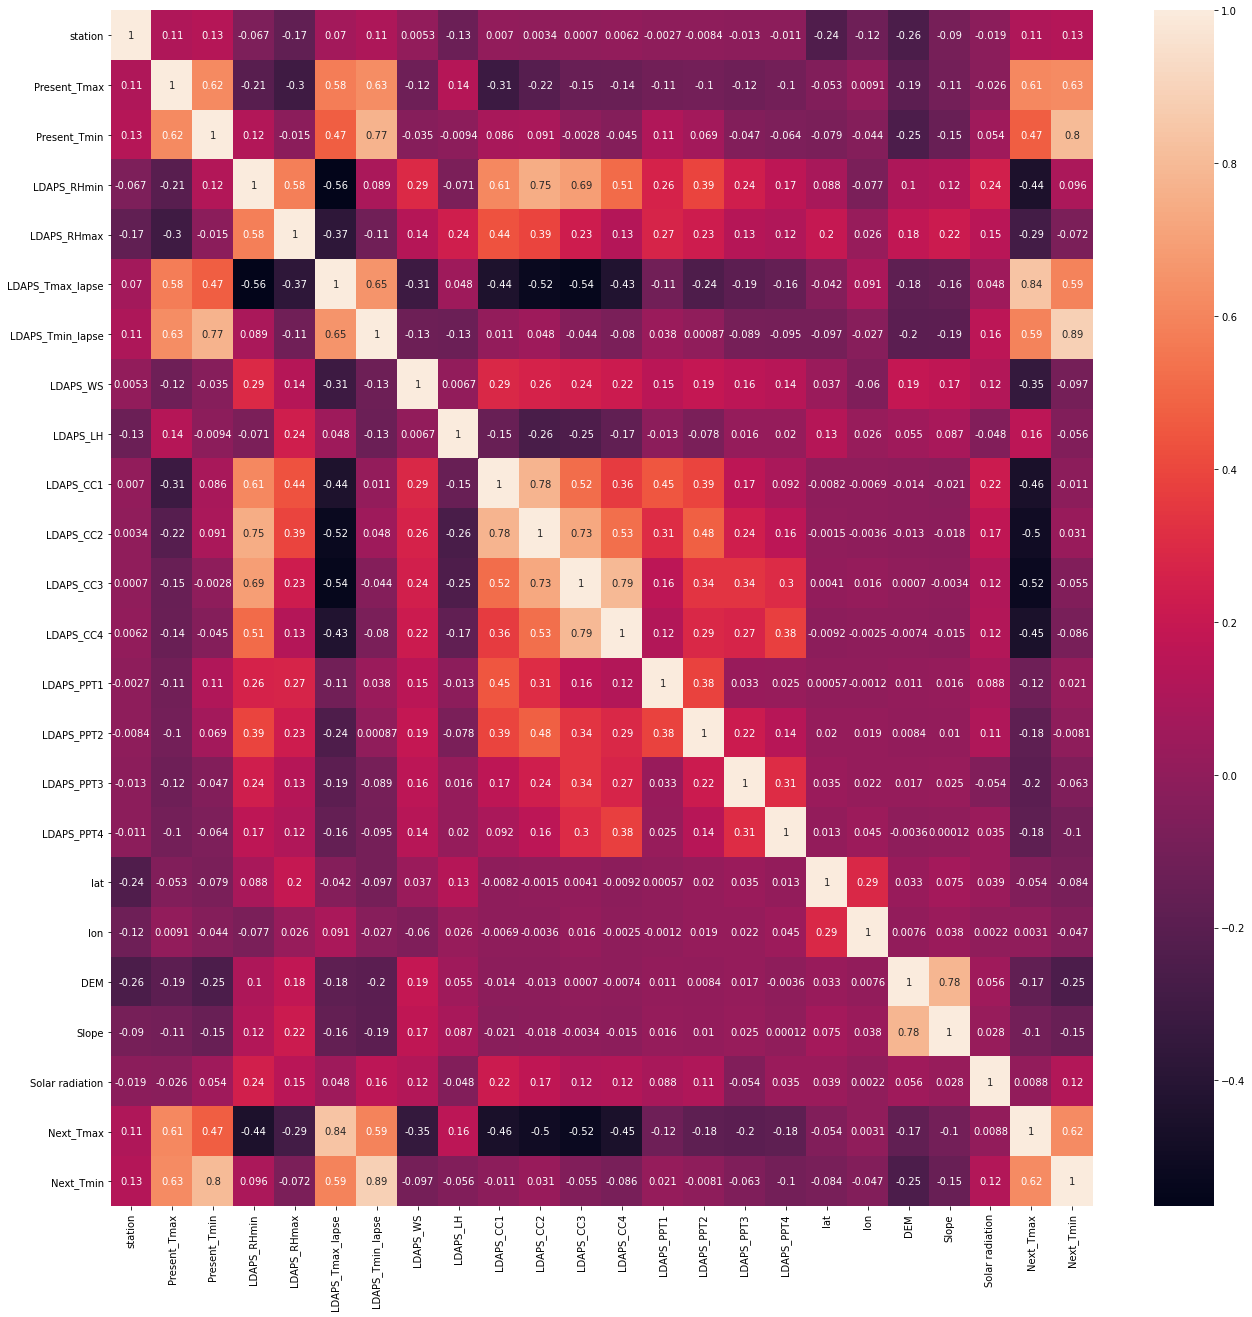

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,22))

sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10})
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

ln_model = LinearRegression()
ln_model.fit(X_train, Y_train)
y_pred = ln_model.predict(X_test)
print('Absolute Error %0.3f'%float(np.abs(Y_test-y_pred).sum()/len(y_pred)))
print('Mean squared Error %0.3f'%mean_squared_error(Y_test, y_pred))

Absolute Error 1.219
Mean squared Error 2.682
